In [385]:
%matplotlib inline
import cv2
import numpy as np
import dlib
import os
from delaunayTriangulation import delaunayTriangulation
from matplotlib import pyplot as plt

path = os.path.abspath(os.getcwd())

In [386]:
landmarks_nums = 81

In [387]:
# import image

# img = cv2.imread(path+"/photo/bradley_cooper.jpg")
# img = cv2.imread(path+"/photo/avatar3.jpg")
img = cv2.imread(path+"/photo/keanuReeves2.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# img2 = cv2.imread(path+"/photo/jim_carrey.jpg")
# img2 = cv2.imread(path+"/photo/koo.jpg")
img2 = cv2.imread(path+"/photo/benedictCumberbatch.jpg")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



## Loading Face Detector

In [388]:
detector = dlib.get_frontal_face_detector()

## Loading Facial landmarks detector

In [389]:
face_landmarks = 'shape_predictor_'+str(landmarks_nums)+'_face_landmarks.dat'
predictor = dlib.shape_predictor(path+"/shapePredictor/"+face_landmarks)

## Make a img's face mask

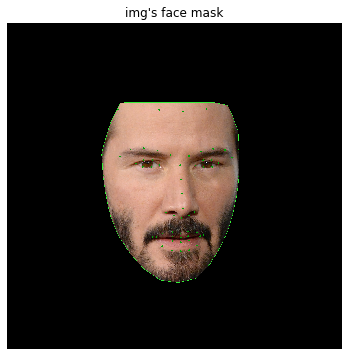

In [390]:
faces = detector(img_gray)
# faces, scores, idx = detector.run(img_gray, 0, -1)
xn = 0
yn = 0
w = 0
h = 0
imgFaceMask = img.copy()
for face in faces:
    xn = face.left()
    yn = face.top()
    w = face.right() - face.left()
    h = face.bottom() - face.top()
    # print(xn, yn, w, h)
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, landmarks_nums):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        cv2.circle(imgFaceMask, (x, y), 4, (6, 162, 2), -1)

points = np.array(landmarks_points, np.int32)

# make a img's face mask
mask = np.zeros_like(img_gray)
convexhull = cv2.convexHull(points)
cv2.polylines(imgFaceMask, [convexhull], True, (54, 236, 52), 2)
cv2.fillConvexPoly(mask, convexhull, 255)
face_image_1 = cv2.bitwise_and(img, img, mask=mask)
# [yn-30:yn+h+25,xn-30:xn+w+25][yn:yn+h,xn:xn+w][yn-30:yn+h+10,xn-20:xn+w+10]

plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.bitwise_and(imgFaceMask, imgFaceMask, mask=mask), cv2.COLOR_BGR2RGB), aspect='auto')
plt.title("img's face mask")
plt.xticks([]), plt.yticks([])
plt.show()

## Triangulation

In [ ]:
#  Delaunay triangulation
# indexes_triangles = delaunayTriangulation(convexhull, landmarks_points, points)

## Open mouth

In [391]:
# Remove triangles from point numbers 60 to 67
if landmarks_nums == 68:
    # 68
    indexes_triangles = [[36, 0, 17], [0, 36, 1], [7, 57, 8], [57, 7, 58], [30, 35, 34], [35, 30, 29], [2, 1, 41], [35, 29, 47], [3, 2, 48], [62, 61, 51], [4, 3, 48], [5, 4, 48], [10, 56, 55], [56, 10, 9], [6, 5, 59], [31, 49, 48], [49, 31, 32], [7, 6, 58], [31, 29, 30], [29, 31, 39], [9, 8, 56], [21, 27, 39], [27, 21, 22], [11, 10, 55], [44, 47, 43], [47, 44, 46], [12, 11, 54], [40, 38, 39], [38, 40, 37], [13, 12, 54], [37, 40, 41], [14, 13, 54], [37, 18, 19], [18, 37, 36], [15, 14, 46], [39, 27, 28], [16, 15, 45], [20, 23, 21], [23, 20, 24], [0, 18, 17], [18, 36, 17], [37, 19, 20], [47, 29, 42], [22, 21, 23], [20, 21, 38], [42, 29, 28], [42, 22, 43], [22, 42, 27], [27, 42, 28], [44, 25, 45], [25, 44, 24], [22, 23, 43], [43, 23, 24], [
        25, 16, 26], [16, 45, 26], [25, 26, 45], [2, 41, 31], [1, 36, 41], [2, 31, 48], [53, 35, 54], [35, 53, 52], [49, 32, 50], [28, 29, 39], [54, 55, 64], [55, 54, 11], [49, 61, 60], [51, 33, 52], [33, 51, 50], [31, 30, 32], [56, 8, 57], [32, 30, 33], [52, 33, 34], [32, 33, 50], [33, 30, 34], [54, 35, 14], [14, 35, 46], [34, 35, 52], [15, 46, 45], [31, 41, 40], [36, 37, 41], [37, 20, 38], [38, 21, 39], [39, 31, 40], [46, 44, 45], [24, 44, 43], [42, 43, 47], [46, 35, 47], [5, 48, 59], [48, 49, 60], [58, 6, 59], [49, 50, 61], [50, 51, 61], [63, 62, 51], [51, 52, 63], [52, 53, 63], [53, 54, 64], [63, 53, 64], [55, 56, 65], [56, 57, 66], [57, 58, 66], [59, 48, 60], [58, 59, 67], [60, 59, 67], [66, 58, 67], [56, 66, 65], [55, 65, 64]]

if landmarks_nums == 81:
    # 81
    indexes_triangles = [[36, 0, 17], [0, 36, 1], [62, 61, 51], [48, 41, 31], [41, 48, 2], [2, 1, 41], [1, 36, 41], [3, 2, 48], [57, 9, 8], [9, 57, 56], [4, 3, 48], [5, 4, 48], [14, 54, 35], [54, 14, 13], [6, 5, 59], [44, 46, 47], [46, 44, 45], [7, 6, 58], [30, 35, 34], [35, 30, 29], [8, 7, 57], [10, 9, 56], [38, 40, 37], [40, 38, 39], [11, 10, 55], [12, 11, 54], [19, 37, 18], [37, 19, 20], [13, 12, 54], [36, 18, 37], [18, 36, 17], [15, 14, 45], [31, 39, 29], [39, 31, 40], [16, 15, 26], [43, 23, 44], [23, 43, 22], [75, 18, 77], [18, 75, 19], [39, 27, 28], [27, 39, 21], [17, 0, 77], [77, 18, 17], [35, 29, 47], [19, 75, 76], [42, 29, 28], [29, 42, 47], [70, 20, 19], [20, 70, 21], [21, 22, 27], [22, 21, 71], [20, 21, 38], [42, 22, 43], [22, 42, 27], [27, 42, 28], [21, 70, 71], [70, 19, 69], [23, 22, 71], [69, 19, 76], [44, 25, 45], [25, 44, 24], [23, 24, 44], [24, 23, 80], [
        23, 71, 80], [26, 74, 78], [74, 26, 25], [25, 24, 79], [79, 24, 80], [26, 15, 45], [25, 26, 45], [16, 26, 78], [31, 29, 30], [11, 55, 54], [49, 31, 50], [31, 49, 48], [28, 29, 39], [34, 52, 33], [52, 34, 35], [6, 59, 58], [51, 33, 52], [33, 51, 50], [50, 31, 32], [31, 30, 32], [32, 30, 33], [10, 56, 55], [32, 33, 50], [33, 30, 34], [35, 54, 53], [14, 35, 46], [45, 14, 46], [37, 40, 41], [36, 37, 41], [37, 20, 38], [38, 21, 39], [40, 31, 41], [44, 47, 43], [42, 43, 47], [46, 35, 47], [5, 48, 59], [48, 49, 60], [61, 49, 50], [49, 61, 60], [57, 7, 58], [50, 51, 61], [63, 62, 51], [51, 52, 63], [52, 35, 53], [54, 55, 64], [52, 53, 63], [53, 54, 64], [63, 53, 64], [55, 56, 65], [56, 57, 66], [57, 58, 66], [59, 48, 60], [58, 59, 67], [59, 60, 67], [67, 66, 58], [66, 65, 56], [55, 65, 64], [69, 71, 70], [71, 69, 72], [68, 69, 76], [80, 73, 79], [73, 80, 72], [71, 72, 80], [74, 25, 79]]

## Triangulation img's face

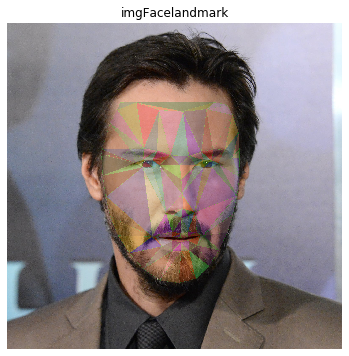

In [392]:
# show line
imgFacelandmarkOverlay = img.copy()
for ti in indexes_triangles:
    vertices = np.array(
        [points[ti[0]], points[ti[1]], points[ti[2]]], np.int32)
    pts = vertices.reshape((-1, 1, 2))
    cv2.polylines(imgFacelandmarkOverlay, [pts], isClosed=True,
                  color=(54, 236, 52), thickness=2)
    cv2.fillPoly(imgFacelandmarkOverlay, [
                 pts], color=(int((int(ti[0])*int(ti[1])) % 255), int((int(ti[1])*int(ti[2])) % 255), int((int(ti[2])*int(ti[0])) % 255)))
    alpha = 0.3
    imgFacelandmark = cv2.addWeighted(
        imgFacelandmarkOverlay, alpha, img, 1 - alpha, 0)

plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(cv2.cvtColor(imgFacelandmark, cv2.COLOR_BGR2RGB), aspect='auto')
plt.title("imgFacelandmark")
plt.xticks([]), plt.yticks([])
plt.show()

## Triangulation img2's face

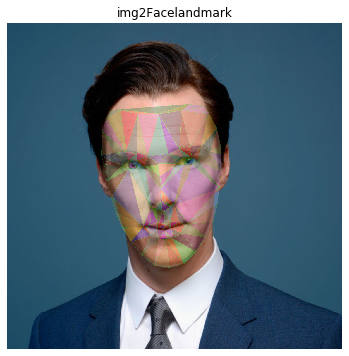

In [393]:
# Face 2
faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, landmarks_nums):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))
#         cv2.circle(img2, (x, y), 3, (0, 255, 0), -1)
    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)

img2FacelandmarkOverlay = img2.copy()
for ti in indexes_triangles:
    # pt1 = tuple(points2[ti[0]])
    # pt2 = tuple(points2[ti[1]])
    # pt3 = tuple(points2[ti[2]])
    vertices = np.array(
        [points2[ti[0]], points2[ti[1]], points2[ti[2]]], np.int32)
    pts = vertices.reshape((-1, 1, 2))
    cv2.polylines(img2FacelandmarkOverlay, [pts], isClosed=True,
                  color=(54, 236, 52), thickness=2)
    cv2.fillPoly(img2FacelandmarkOverlay, [
                 pts], color=(int((int(ti[0])*int(ti[1])) % 255), int((int(ti[1])*int(ti[2])) % 255), int((int(ti[2])*int(ti[0])) % 255)))
    alpha = 0.3
    img2Facelandmark = cv2.addWeighted(
        img2FacelandmarkOverlay, alpha, img2, 1 - alpha, 0)

plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(cv2.cvtColor(img2Facelandmark, cv2.COLOR_BGR2RGB), aspect='auto')
plt.title("img2Facelandmark")
plt.xticks([]), plt.yticks([])
plt.show()


## Mouth's Convex hull

In [394]:
mouth = []
for i in range(60,68):
    # pt1 = tuple(points2[i])
    mouth.append(tuple(points2[i]))

mouthPoint = np.array(mouth, np.int32)
mouthConvexhull = cv2.convexHull(mouthPoint)

## Extract and warp triangles

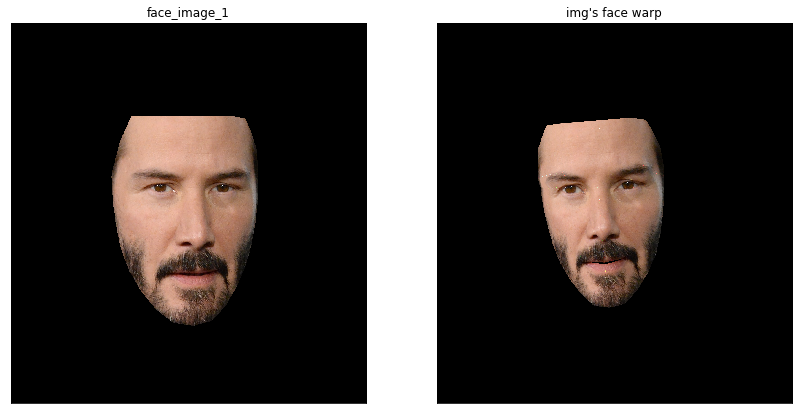

In [395]:
img2_new_face = np.zeros_like(img2)
for triangle_index in indexes_triangles:
    # Triangulation of the first face
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)

    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                    [tr1_pt2[0] - x, tr1_pt2[1] - y],
                    [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

    # Triangulation of second face
    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2

    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                        [tr2_pt2[0] - x, tr2_pt2[1] - y],
                        [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

    # Warp triangles
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    try:
        warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    except:
        warped_triangle = cropped_triangle

    warped_triangle = cv2.bitwise_and(
        warped_triangle, warped_triangle, mask=cropped_tr2_mask)

    # Piecing face's jigsaw puzzle
    ### method 1
    img2_piece_face = np.zeros_like(img2)
    img2_piece_face[y: y + h, x: x + w] = warped_triangle
    img2_new_face = cv2.bitwise_or(img2_new_face, img2_piece_face)
    # titles = ["img2_new_face", "warped_triangle"]
    # images = [img2_new_face, warped_triangle]
    # plt.figure(figsize=(14, 7))
    # plt.axis("off")
    # for i in range(len(titles)):
    #     plt.subplot(1, len(titles), i+1)
    #     plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), aspect='auto')
    #     plt.title(titles[i])
    #     plt.xticks([]), plt.yticks([])
    # plt.show()

    ### method 2
    # img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    # img2_new_face_rect_area_gray = cv2.cvtColor(
    #     img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)

    # _, mask_triangles_designed = cv2.threshold(
    #     img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
        
    # warped_triangle = cv2.bitwise_and(
    #     warped_triangle, warped_triangle, mask=mask_triangles_designed)

    # img2_new_face_rect_area = cv2.add(
    #     img2_new_face_rect_area, warped_triangle)
    
    # img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area
    
    # # showing piecing face's jigsaw puzzle
    # # titles = ["img2_new_face", "mask_triangles_designed", "warped_triangle", "img2_new_face_rect_area"]
    # # images = [img2_new_face, mask_triangles_designed, warped_triangle, img2_new_face_rect_area]
    # # plt.figure(figsize=(14, 7))
    # # plt.axis("off")
    # # for i in range(len(titles)):
    # #     plt.subplot(1, len(titles), i+1)
    # #     plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), aspect='auto')
    # #     plt.title(titles[i])
    # #     plt.xticks([]), plt.yticks([])
    # # plt.show()
    

# plt.figure(figsize=(6, 6))
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img2_new_face, cv2.COLOR_BGR2RGB), aspect='auto')
# plt.title("img2_new_face")
# plt.xticks([]), plt.yticks([])
# plt.show()
# face_image_1n = face_image_1[y: y + h, x: x + w]
titles = ["face_image_1", "img's face warp"]
images = [face_image_1, img2_new_face]
plt.figure(figsize=(14, 7))
plt.axis("off")
for i in range(len(titles)):
    plt.subplot(1, len(titles), i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), aspect='auto')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [396]:
 # titles = ["mask_triangles_designed", "warped_triangle", "img2_new_face_rect_area"]
    # images = [mask_triangles_designed, warped_triangle, img2_new_face_rect_area]
    # plt.figure(figsize=(14, 7))
    # plt.axis("off")
    # for i in range(len(titles)):
    #     plt.subplot(1, len(titles), i+1)
    #     plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), aspect='auto')
    #     plt.title(titles[i])
    #     plt.xticks([]), plt.yticks([])
    # plt.show()

## Putting 1st face into 2nd face

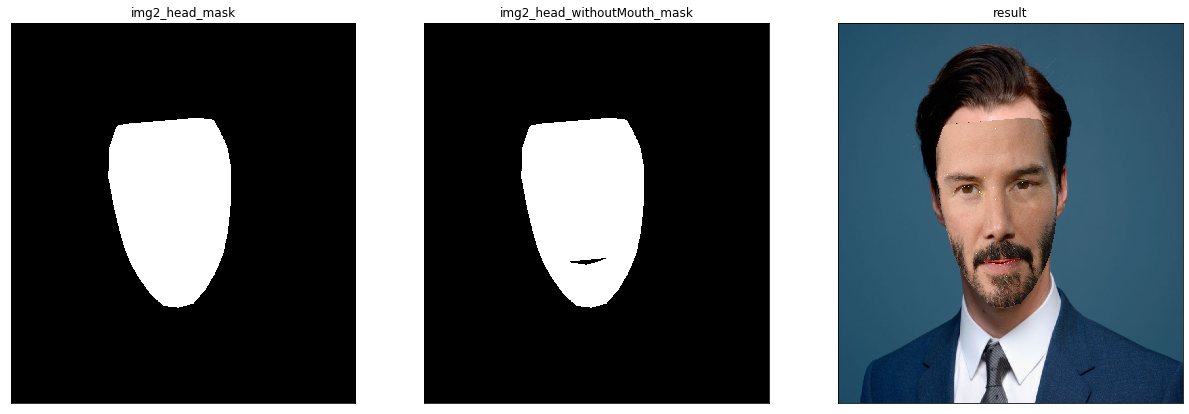

In [397]:

img2_face_mask = np.zeros_like(img2_gray)

img2_mouth_mask = cv2.fillConvexPoly(img2_face_mask+255, mouthConvexhull, 0)

img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)

img2_head_withoutMouth_mask = cv2.bitwise_and(img2_mouth_mask, img2_head_mask)

# img2_face_mask = cv2.bitwise_not(img2_head_mask)
img2_face_mask = cv2.bitwise_not(img2_head_withoutMouth_mask)

img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)

result = cv2.add(img2_head_noface, img2_new_face)
# cv2.imshow("result", result)
titles = ["img2_head_mask", "img2_head_withoutMouth_mask", "result"]
images = [img2_head_mask, img2_head_withoutMouth_mask, result]

plt.figure(figsize=(21, 7))
plt.axis("off")
for i in range(len(titles)):
    plt.subplot(1, len(titles), i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), aspect='auto')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()



## Seamless Cloning

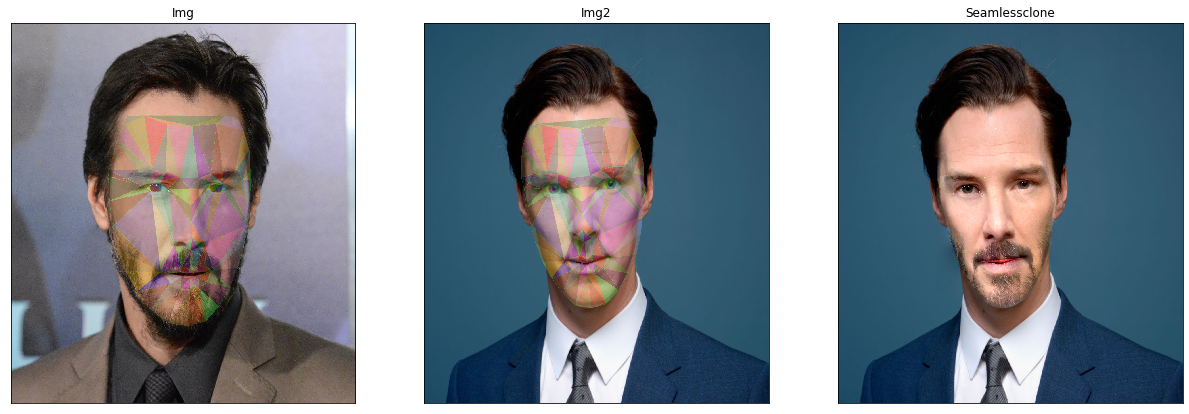

In [398]:
(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.MIXED_CLONE)
# MIXED_CLONE
# NORMAL_CLONE

titles = ["Img", "Img2", "Seamlessclone"]
images = [imgFacelandmark, img2Facelandmark, seamlessclone]

plt.figure(figsize=(21, 7))
plt.axis("off")
for i in range(len(titles)):
    plt.subplot(1, len(titles), i+1)
    # plt.imshow(images[i], 'gray')
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), aspect='auto')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

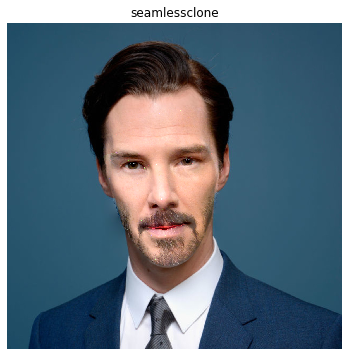

In [399]:
plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2RGB), aspect='auto')
plt.title("seamlessclone")
plt.xticks([]), plt.yticks([])
plt.show()